In [6]:
from HelperFunctions import *

In [7]:
check_gpu()

TensorFlow is using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
dataset_directory = '../ImageSets/TestImages'
all_image_paths = get_image_paths(dataset_directory)
train_paths, val_paths, test_paths = train_val_test_split(all_image_paths) 

In [9]:
clear_train, clear_val, clear_test = create_train_val_test_datasets(train_paths, val_paths, test_paths)
clear_train, clear_val, clear_test = load_train_val_test_images(clear_train, clear_val, clear_test)
clear_train, clear_val, clear_test = preprocess_train_val_test_images(clear_train, clear_val, clear_test)
blurred_train, blurred_val, blurred_test = blur_train_val_test_images(clear_train, clear_val, clear_test)
train_data, validation_data, test_data = zip_train_val_test_images(blurred_train, clear_train, blurred_val, clear_val, blurred_test, clear_test)
train_data, validation_data, test_data = batch_train_val_test_images(train_data, validation_data, test_data)

In [10]:
input_shape = (256, 256, 3)
model = load_and_compile_model(input_shape, model_directory = "../Models/DeeperImageDeblurModel.h5", output_summary = True, deeper_model = True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

1/1 [==============================] - 12s 12s/step


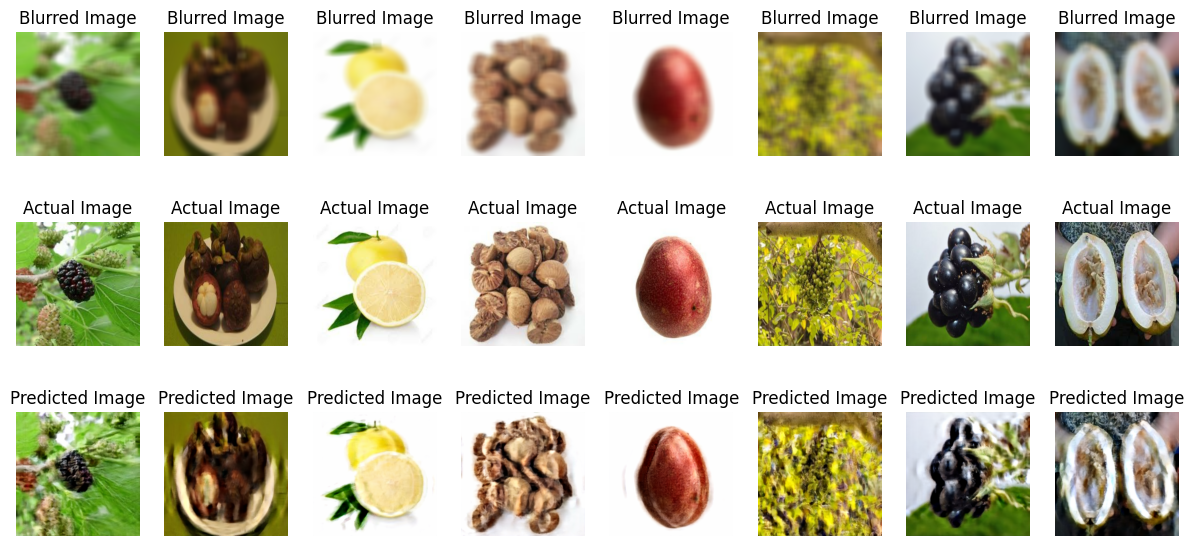

In [11]:
test_images, test_labels, pred_images = get_test_batch(model, test_data)
display_predictions(test_images, test_labels, pred_images)